In [4]:
import sys

import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter

In [2]:
# Utils

# Importer une image
def import_image(filename):
    image = ski.io.imread(filename)
    return np.array(image)

# Afficher une image
def display_image(image, title):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Calculer le PSNR entre deux images
def psnr(original_image, processed_image):
    original_image = original_image.astype(np.float64)
    processed_image = processed_image.astype(np.float64)
    mse = np.mean((original_image - processed_image) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr_value

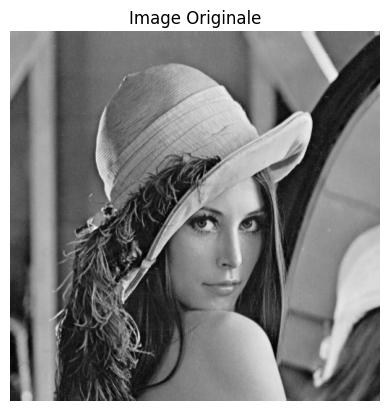

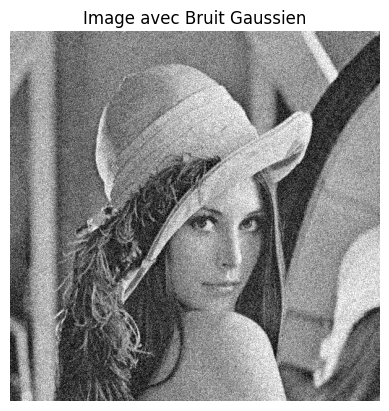

PSNR entre l'image originale et l'image bruitée :  20.05772074683382
PSNR avec L=1 : 27.69
PSNR avec L=2 : 28.93
PSNR avec L=3 : 28.65
PSNR avec L=5 : 27.63
PSNR avec L=7 : 26.75


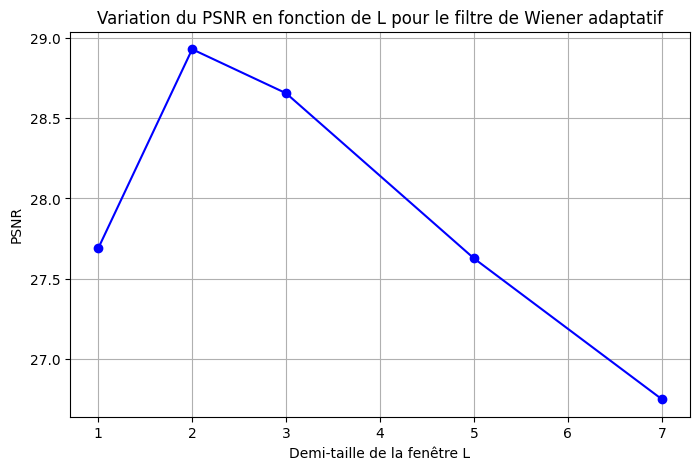

In [5]:

image = io.imread("lena.pgm", as_gray=True)
display_image(image, "Image Originale")

image = image / 255.0

noise_variance = 0.01
image_noised = image + np.random.normal(0, np.sqrt(noise_variance), image.shape)
image_noised = np.clip(image_noised, 0, 1)
display_image(image_noised, "Image avec Bruit Gaussien")

psnr_originale_bruitee = psnr(image * 255, image_noised * 255)
print("PSNR entre l'image originale et l'image bruitée : ", psnr_originale_bruitee)

L_values = [1, 2, 3, 5, 7]  
psnr_values = []

for L in L_values:
    local_mean = uniform_filter(image_noised, size=(2 * L + 1))
    local_mean_sq = uniform_filter(image_noised ** 2, size=(2 * L + 1))
    local_variance = local_mean_sq - local_mean ** 2

    wiener_filtered = local_mean + (np.maximum(local_variance - noise_variance, 0) / 
                                    (local_variance + noise_variance)) * (image_noised - local_mean)

    psnr_val = psnr(image * 255, wiener_filtered * 255)
    psnr_values.append(psnr_val)
    print(f"PSNR avec L={L} : {psnr_val:.2f}")

plt.figure(figsize=(8, 5))
plt.plot(L_values, psnr_values, marker='o', linestyle='-', color='b')
plt.xlabel("Demi-taille de la fenêtre L")
plt.ylabel("PSNR")
plt.title("Variation du PSNR en fonction de L pour le filtre de Wiener adaptatif")
plt.grid()
plt.show()
